# Procedural flow defined by recipe

In [1]:
!esmvaltool recipes get examples/recipe_python.yml

2021-02-16 16:07:26,262 UTC [15493] INFO    Copying installed recipe to the current folder...
2021-02-16 16:07:26,262 UTC [15493] INFO    Recipe examples/recipe_python.yml successfully copied


In [2]:
print(open('recipe_python.yml', 'r').read())

# ESMValTool
# recipe_python.yml
---
documentation:
  description: |
    Example recipe that plots a map and timeseries of temperature.

  authors:
    - andela_bouwe
    - righi_mattia

  maintainer:
    - schlund_manuel

  references:
    - acknow_project

  projects:
    - esmval
    - c3s-magic

datasets:
  - {dataset: BCC-ESM1, project: CMIP6, exp: historical, ensemble: r1i1p1f1, grid: gn}
  - {dataset: CanESM2, project: CMIP5, exp: historical, ensemble: r1i1p1}

preprocessors:

  select_january:
    extract_month:
      month: 1

  annual_mean_amsterdam:
    extract_point:
      latitude: 52.379189
      longitude: 4.899431
      scheme: linear
    annual_statistics:
      operator: mean
    multi_model_statistics:
      statistics:
        - mean
      span: overlap

  annual_mean_global:
    area_statistics:
      operator: mean
    annual_statistics:
      operator: mean

diagnostics:

  map:
    description: Global map of temperature in January 2000.
    themes:
      - phys


In [3]:
!esmvaltool run recipe_python.yml

/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/config.py:139: UserWarning: Ignoring config item 'Resources':'test_data_dir' (section:option) as '/home/h05/itwl/projects/git/iris-test-data/test_data' is not a valid directory path.
  warnings.warn(msg.format(section, option, c_path))
2021-02-16 16:07:29,367 UTC [15495] INFO    
______________________________________________________________________
          _____ ____  __  ____     __    _ _____           _
         | ____/ ___||  \/  \ \   / /_ _| |_   _|__   ___ | |
         |  _| \___ \| |\/| |\ \ / / _` | | | |/ _ \ / _ \| |
         | |___ ___) | |  | | \ V / (_| | | | | (_) | (_) | |
         |_____|____/|_|  |_|  \_/ \__,_|_| |_|\___/ \___/|_|
______________________________________________________________________

ESMValTool - Earth System Model Evaluation Tool.

http://www.esmvaltool.org

CORE DEVELOPMENT TEAM AND CONTACTS:
  Birgit Hassler (Co-PI; DLR, Germany - birgit.hassler@dlr.de)
  Alistair Sellar (C

2021-02-16 16:07:37,810 UTC [15495] INFO    Progress: 3 tasks running, 1 tasks waiting for ancestors, 1/5 done
2021-02-16 16:07:40,184 UTC [15504] WARNING /home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")

2021-02-16 16:07:40,185 UTC [15504] INFO    Calculated grid area shape: (1812, 64, 128)
2021-02-16 16:07:40,731 UTC [15505] INFO    Maximum memory used (estimate): 0.2 GB
2021-02-16 16:07:40,732 UTC [15505] INFO    Sampled every second. It may be inaccurate if short but high spikes in memory consumption occur.
2021-02-16 16:07:40,860 UTC [15503] INFO    Generated PreprocessorFile: /home/stef/esmvaltool_output/recipe_python_20210216_160729/preproc/timeseries/tas_amsterdam/MultiModelMean_Amon_tas_1850-2000.nc
2021-02-16 16:07:41,724 UTC [15505] INFO    Successfully completed task map/script1 (priority 1) in 0:00:04.010251
2021-02-

Output is difficult to navigate

In [4]:
!tree /home/stef/esmvaltool_output/`ls -t /home/stef/esmvaltool_output/ | head -n1`

/home/stef/esmvaltool_output/recipe_python_20210216_160729
├── index.html
├── plots
│   ├── map
│   │   └── script1
│   │       └── png
│   │           ├── CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png
│   │           ├── CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000_citation.bibtex
│   │           ├── CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000_data_citation_info.txt
│   │           ├── CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000_provenance.svg
│   │           ├── CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000_provenance.xml
│   │           ├── CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png
│   │           ├── CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000_citation.bibtex
│   │           ├── CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000_data_citation_info.txt
│   │           ├── CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000_provenance.svg
│   │           └── CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000_provenan

# Recipe metadata

In the ESMValTool project, authors are defined by tags, i.e. `lastname_firstname`.

The tags point to entries in a dict in a large yaml config.

Look-up and resolve author tags:

In [5]:
from esmvalcore.experimental.recipe_metadata import Contributor

author = Contributor.from_tag('doe_john')
print(f'{author.name=}')
print(f'{author.institute=}')
print(f'{author.orcid=}')

/home/stef/r/esmvalcore/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/config.py:139: UserWarning: Ignoring config item 'Resources':'test_data_dir' (section:option) as '/home/h05/itwl/projects/git/iris-test-data/test_data' is not a valid directory path.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.4.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.4.0.


author.name='John Doe'
author.institute='Testing'
author.orcid='https://orcid.org/0000-0000-0000-0000'


Reference tags point to a bibtex file in the ESMValTool directory. They are loaded and rendered using `pybtex`.

In [6]:
from esmvalcore.experimental.recipe_metadata import Reference
reference = Reference.from_tag('brunner2019')
print(reference)

Lukas Brunner, Ruth Lorenz, Marius Zumwald, and Reto Knutti. Quantifying uncertainty in european climate projections using combined performance-independence weighting. Environmental Research Letters, 14(12):124010, nov 2019. URL: https://doi.org/10.1088%2F1748-9326%2Fab492f, doi:10.1088/1748-9326/ab492f.


# Rendering output in a Jupyter Notebook

https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html

Frontends for:

- HTML
- JSON
- PNG
- JPEG
- SVG
- LaTeX

In [7]:
class MyClass:
    pass

my_class = MyClass()
my_class

In [8]:
class MyClass:
    def __repr__(self):
        return 'My cool class 😎'

my_class = MyClass()
my_class

My cool class 😎

IPython looks for `_repr_$_` methods

In [9]:
class MyClass:
    def __repr__(self):
        return 'My cool class'
    
    def _repr_markdown_(self):
        return """# My cool markdown header"""

my_class = MyClass()
my_class

# My cool markdown header

# Jinja2 as a templating engine

https://jinja.palletsprojects.com/

Jinja is a modern and designer-friendly templating language for Python, modelled after Django’s templates. It is fast, widely used and secure.

In [10]:
from jinja2 import Template

template = Template('Hello {{ author.name }}!')
template.render(author=author)

'Hello John Doe!'

In [11]:
template = Template("""
<h2>my list</h2>

<ul>
  {% for number in numbers %}
     <li>{{ number }}</li>
  {% endfor %}
</ul>
""")

rendered = template.render(numbers=('one', 'two', 'three', 'four'))
print(rendered)


<h2>my list</h2>

<ul>
  
     <li>one</li>
  
     <li>two</li>
  
     <li>three</li>
  
     <li>four</li>
  
</ul>


In [12]:
from IPython.display import HTML
HTML(rendered)

# Combining Jinja2 with `_repr_html_`

In [13]:
class Linkifier:
    template = Template('<a href="{{ url }}">Click here!</a>')
    
    def __init__(self, url):
        self.url = url
    
    def _repr_html_(self):
        return self.template.render(url=self.url)
        
my_class = Linkifier('https://www.esciencecenter.nl')
my_class

Rendering authors and references in a notebook:

In [14]:
author = Contributor.from_tag('doe_john')
author

John Doe (Testing; https://orcid.org/0000-0000-0000-0000)

In [15]:
reference = Reference.from_tag('brunner2019')
reference

Reference('Brunner2019')

# Rendering recipe metadata

All metadata in the recipe documentation can be resolved and rendered.

In [16]:
from esmvalcore.experimental import get_recipe

recipe = get_recipe('examples/recipe_python.yml')
recipe

Recipe('Recipe python')

# Searching for recipes

Because all the tags are resolved, it is possible to search for recipes.

In [17]:
from esmvalcore.experimental import get_all_recipes

recipes = get_all_recipes()
recipes

[Recipe('Recipe perfmetrics cmip5 4cds'),
 Recipe('Recipe martin18grl'),
 Recipe('Recipe zmnam'),
 Recipe('Recipe heatwaves coldwaves'),
 Recipe('Recipe albedolandcover'),
 Recipe('Recipe arctic ocean'),
 Recipe('Recipe validation cmip6'),
 Recipe('Recipe autoassess radiation rms cfmon all'),
 Recipe('Recipe clouds ipcc'),
 Recipe('Recipe seaice drift'),
 Recipe('Recipe kcs'),
 Recipe('Recipe autoassess radiation rms amon all'),
 Recipe('Recipe ocean landschuetzer2016'),
 Recipe('Recipe ocean scalar fields'),
 Recipe('Recipe toymodel'),
 Recipe('Recipe combined indices'),
 Recipe('Recipe miles block'),
 Recipe('Recipe eyring13jgr 12'),
 Recipe('Recipe clouds bias'),
 Recipe('Recipe perfmetrics land cmip5'),
 Recipe('Recipe climwip'),
 Recipe('Recipe wenzel16nat'),
 Recipe('Recipe ecs constraints'),
 Recipe('Recipe snowalbedo'),
 Recipe('Recipe hyint'),
 Recipe('Recipe collins13ipcc'),
 Recipe('Recipe wenzel14jgr'),
 Recipe('Recipe seaice feedback'),
 Recipe('Recipe li17natcc'),
 Recipe

`get_all_recipes` returns an instance of `RecipeList`, which has a `find` method.

This makes it possible to search recipes by author institute:

In [18]:
recipes_by_nlesc = recipes.find('NLeSC')
recipes_by_nlesc

[Recipe('Recipe kcs'),
 Recipe('Recipe climwip'),
 Recipe('Recipe r'),
 Recipe('Recipe extract shape'),
 Recipe('Recipe preprocessor test'),
 Recipe('Recipe correlation'),
 Recipe('Recipe preprocessor derive test'),
 Recipe('Recipe python'),
 Recipe('Recipe era5'),
 Recipe('Recipe marrmot'),
 Recipe('Recipe hype'),
 Recipe('Recipe lisflood'),
 Recipe('Recipe wflow'),
 Recipe('Recipe pcrglobwb')]

And refine that list by author name:

In [19]:
recipes_by_stef = recipes_by_nlesc.find('Stef Smeets')
recipes_by_stef

[Recipe('Recipe climwip')]

In [20]:
recipe = recipes_by_stef[0]
recipe

Recipe('Recipe climwip')

# Running a recipe

In [21]:
from esmvalcore.experimental import Recipe

recipe = Recipe('recipe_python.yml')
output = recipe.run()

{'auxiliary_data_dir': PosixPath('/home/stef/r/recipes_auxiliary_datasets'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/stef/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default', 'OBS6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': 4,
 'output_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210216_160757'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210216_160757/plots'),
 'preproc_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210216_160757/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': False,
 'rootpath': {'CMIP5': [PosixPath('/home/stef/data')],
              'CMIP6': [PosixPath('/home/stef/data'),
                        PosixPath('/home/stef/r/esmvaltool_sample_data/esmvaltool_sample_data/data/timeseries/CMIP6')],
              'OBS6': [PosixPath('/home/stef/data')],
   

/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Calculated grid area shape: (1812, 64, 128)
Successfully completed task map/tas (priority 0) in 0:00:07.773710
Progress: 2 tasks running, 2 tasks waiting for ancestors, 1/5 done
Starting task map/script1 in process [15598]
Running command ['/home/stef/miniconda3/envs/esmvaltool/bin/python', '/home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py', '/home/stef/esmvaltool_output/recipe_python_20210216_160757/run/map/script1/settings.yml']
Writing output to /home/stef/esmvaltool_output/recipe_python_20210216_160757/work/map/script1
Writing plots to /home/stef/esmvaltool_output/recipe_python_20210216_160757/plots/map/script1
Writing log to /home/stef/esmvaltool_output/recipe_python_20210216_160757/run/map/script1/log.txt
To re-run this diagnostic script, run:
cd /home/stef/esmvaltool_output/recipe_python_20210216_160757/run/map/script1; MPLBACKEND="Agg" /home/stef/miniconda3/envs/esmvaltool/bin/python /home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py /h

/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Calculated grid area shape: (1812, 64, 128)
Generated PreprocessorFile: /home/stef/esmvaltool_output/recipe_python_20210216_160757/preproc/timeseries/tas_amsterdam/MultiModelMean_Amon_tas_1850-2000.nc
Maximum memory used (estimate): 0.2 GB
Sampled every second. It may be inaccurate if short but high spikes in memory consumption occur.
Successfully completed task map/script1 (priority 1) in 0:00:03.742445
Progress: 2 tasks running, 1 tasks waiting for ancestors, 2/5 done
Successfully completed task timeseries/tas_global (priority 3) in 0:00:12.818019
Progress: 1 tasks running, 1 tasks waiting for ancestors, 3/5 done
Successfully completed task timeseries/tas_amsterdam (priority 2) in 0:00:13.382776
Progress: 0 tasks running, 1 tasks waiting for ancestors, 4/5 done
Starting task timeseries/script1 in process [15595]
Running command ['/home/stef/miniconda3/envs/esmvaltool/bin/python', '/home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py', '/home/stef/esmvaltool_output/r

In [22]:
output = recipe.get_output()
output

map/script1:
  ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
  ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')

timeseries/script1:
  ImageFile('tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.png')
  ImageFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  DataFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  DataFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  DataFile('tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  DataFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  DataFile('tas_amsterdam_CMIP5_CanESM2_Amon_histor

# Image output

ImageFile('tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.png')
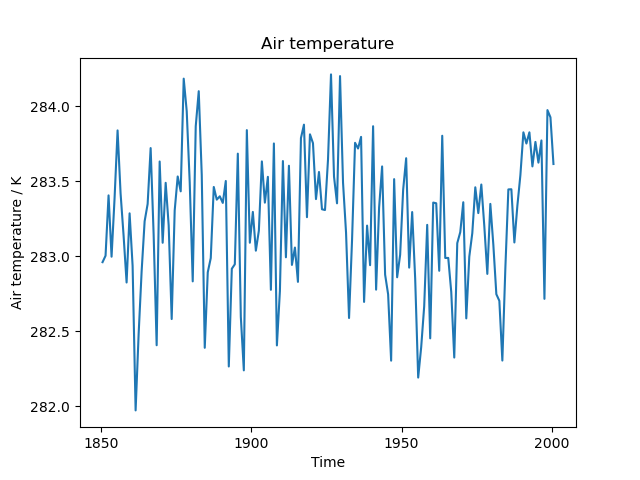

In [23]:
image_file = output['timeseries/script1'].image_files[0]
image_file

Access provenance information:

In [24]:
image_file.attributes

{'authors': ({'name': 'Andela, Bouwe',
   'institute': 'NLeSC, Netherlands',
   'email': 'b.andela@esciencecenter.nl',
   'orcid': 'https://orcid.org/0000-0001-9005-8940'},
  {'name': 'Righi, Mattia',
   'institute': 'DLR, Germany',
   'email': 'mattia.righi@dlr.de',
   'orcid': 'https://orcid.org/0000-0003-3827-5950'}),
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 according to MultiModelMean.',
 'domains': ('global',),
 'plot_types': ('zonal mean',),
 'references': ['acknow_project'],
 'statistics': ('mean',),
 'script_file': 'examples/diagnostic.py',
 'quickplot': {'plot_type': 'plot'},
 'script': 'script1',
 'themes': ('physics',),
 'realms': ('atmosphere',)}

Access citation info:

In [25]:
print(image_file.citation_file.read_text())

@article{righi20gmd,
	doi = {10.5194/gmd-13-1179-2020},
	url = {https://doi.org/10.5194/gmd-13-1179-2020},
	year = {2020},
	month = mar,
	publisher = {Copernicus {GmbH}},
	volume = {13},
	number = {3},
	pages = {1179--1199},
	author = {Mattia Righi and Bouwe Andela and Veronika Eyring and Axel Lauer and Valeriu Predoi and Manuel Schlund and Javier Vegas-Regidor and Lisa Bock and Bj"{o}rn Br"{o}tz and Lee de Mora and Faruk Diblen and Laura Dreyer and Niels Drost and Paul Earnshaw and Birgit Hassler and Nikolay Koldunov and Bill Little and Saskia Loosveldt Tomas and Klaus Zimmermann},
	title = {Earth System Model Evaluation Tool (ESMValTool) v2.0 -- technical overview},
	journal = {Geoscientific Model Development}
}

@misc{acknow_project,
    title = "Please acknowledge the project(s)."
}

@misc{https://doi.org/10.22033/ESGF/CMIP6.2949,
	url = {https://doi.org/10.22033/ESGF/CMIP6.2949},
	title = {BCC BCC-ESM1 model output prepared for CMIP6 CMIP historical},
	publisher = {Earth System Gr

Access data citation info:

In [26]:
print(image_file.data_citation_file.read_text())

Follow the links below to find more information about CMIP6 data:
- https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.CMIP.BCC.BCC-ESM1.historical

Additional data citation information was found, for which no entry is available in the bibtex file:
- http://www.cccma.ec.gc.ca/models



# Data output

In [27]:
data_file = output['timeseries/script1'].data_files[0]
data_file

DataFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')

Load the data using `iris`

In [28]:
cubelist = data_file.load_iris()
cubelist[0]

Air Temperature (K),time
Shape,151
Dimension coordinates,
time,x
Auxiliary coordinates,
year,x
Scalar coordinates,
height,2.0 m
latitude,52.379189 degrees
longitude,4.899431 degrees
Attributes,


Load the data using `xarray`

In [29]:
arr = data_file.load_xarray()
arr

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 151)
Coordinates:
  * time       (time) object 1850-07-01 00:00:00 ... 2000-06-30 18:00:00
    height     float64 2.0
    lat        float64 52.38
    lon        float64 4.899
    year       (time) int64 1850 1851 1852 1853 1854 ... 1997 1998 1999 2000
Dimensions without coordinates: bnds
Data variables:
    tas        (time) float64 282.6 282.5 282.4 282.0 ... 282.7 282.8 282.8
    time_bnds  (time, bnds) object 1849-12-30 12:00:00 ... 2000-12-30 00:00:00
Attributes:
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2110.0
    cmor_version:           3.3.2
    comment:                near-surface (usually, 2 meter) air temperature
    contact:                Dr. Tongwen Wu(twwu@cma.gov.cn)
    data_specs_version:     01.00.27
    description:            DECK: historical
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.BCC.BCC-ESM1...
    grid:                   T42
    grid_label:             gn
    initialization_index:   1
    institution:            Beijing Climate Center, Beijing 100081, China
    institution_id:         BCC
    license:                CMIP6 model data produced by BCC is licensed unde...
    mip_era:                CMIP6
    nominal_resolution:     250 km
    original_name:          TREFHT
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       BCC-ESM1
    parent_time_units:      days since 1850-1-1 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    references:             Model described by Tongwen Wu et al. (JGR 2013; J...
    run_variant:            forcing: greenhouse gases,aerosol emission,solar ...
    source:                 BCC-ESM 1 (2017):   aerosol: none  atmos: BCC_AGC...
    source_id:              BCC-ESM1
    source_type:            AER AOGCM CHEM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(30 July 2018) MD5:e53ff52009d0b97d...
    title:                  BCC-ESM1 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    Conventions:            CF-1.7
    provenance:             <?xml version='1.0' encoding='ASCII'?>\n<prov:doc...
    software:               Created with ESMValTool v2.2.0
    caption:                Average Near-Surface Air Temperature between 1850...

# Customizing an ESMValTool run

In [30]:
from esmvalcore import CFG
CFG

ImportError: cannot import name 'CFG' from 'esmvalcore' (/home/stef/r/esmvalcore/esmvalcore/__init__.py)

In [ ]:
CFG.start_session('my_session')